In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
DATA_DIR = '/content/gdrive/My Drive/Colab Notebooks/'

In [ ]:
%env LC_ALL=C.UTF-8
%env LANG=C.UTF-8

!pip install ultralytics

env: LC_ALL=C.UTF-8
env: LANG=C.UTF-8
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.1/749.1 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 574.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 1

In [72]:
from ultralytics import YOLO
import cv2
import os

model_path = '/content/gdrive/My Drive/Colab Notebooks/Copy_of_last_prediction.pt'
image_path = '/content/gdrive/My Drive/Colab Notebooks/ttrial3.jpeg'

img = cv2.imread(image_path)
H, W, _ = img.shape

model = YOLO(model_path)

results = model(img)

output_path = '/content/output.png'

# Check if the output file already exists
if not os.path.exists(output_path):
    with open(output_path, 'w'):  # Create the file if it doesn't exist
        pass

for result in results:
    for j, mask in enumerate(result.masks.data):
        mask = mask.numpy() * 255
        mask = cv2.resize(mask, (W, H))

        cv2.imwrite(output_path, mask)

print(f"Output saved at: {output_path}")



0: 448x640 1 frame, 201.4ms
Speed: 6.0ms preprocess, 201.4ms inference, 4.6ms postprocess per image at shape (1, 3, 448, 640)
Output saved at: /content/output.png


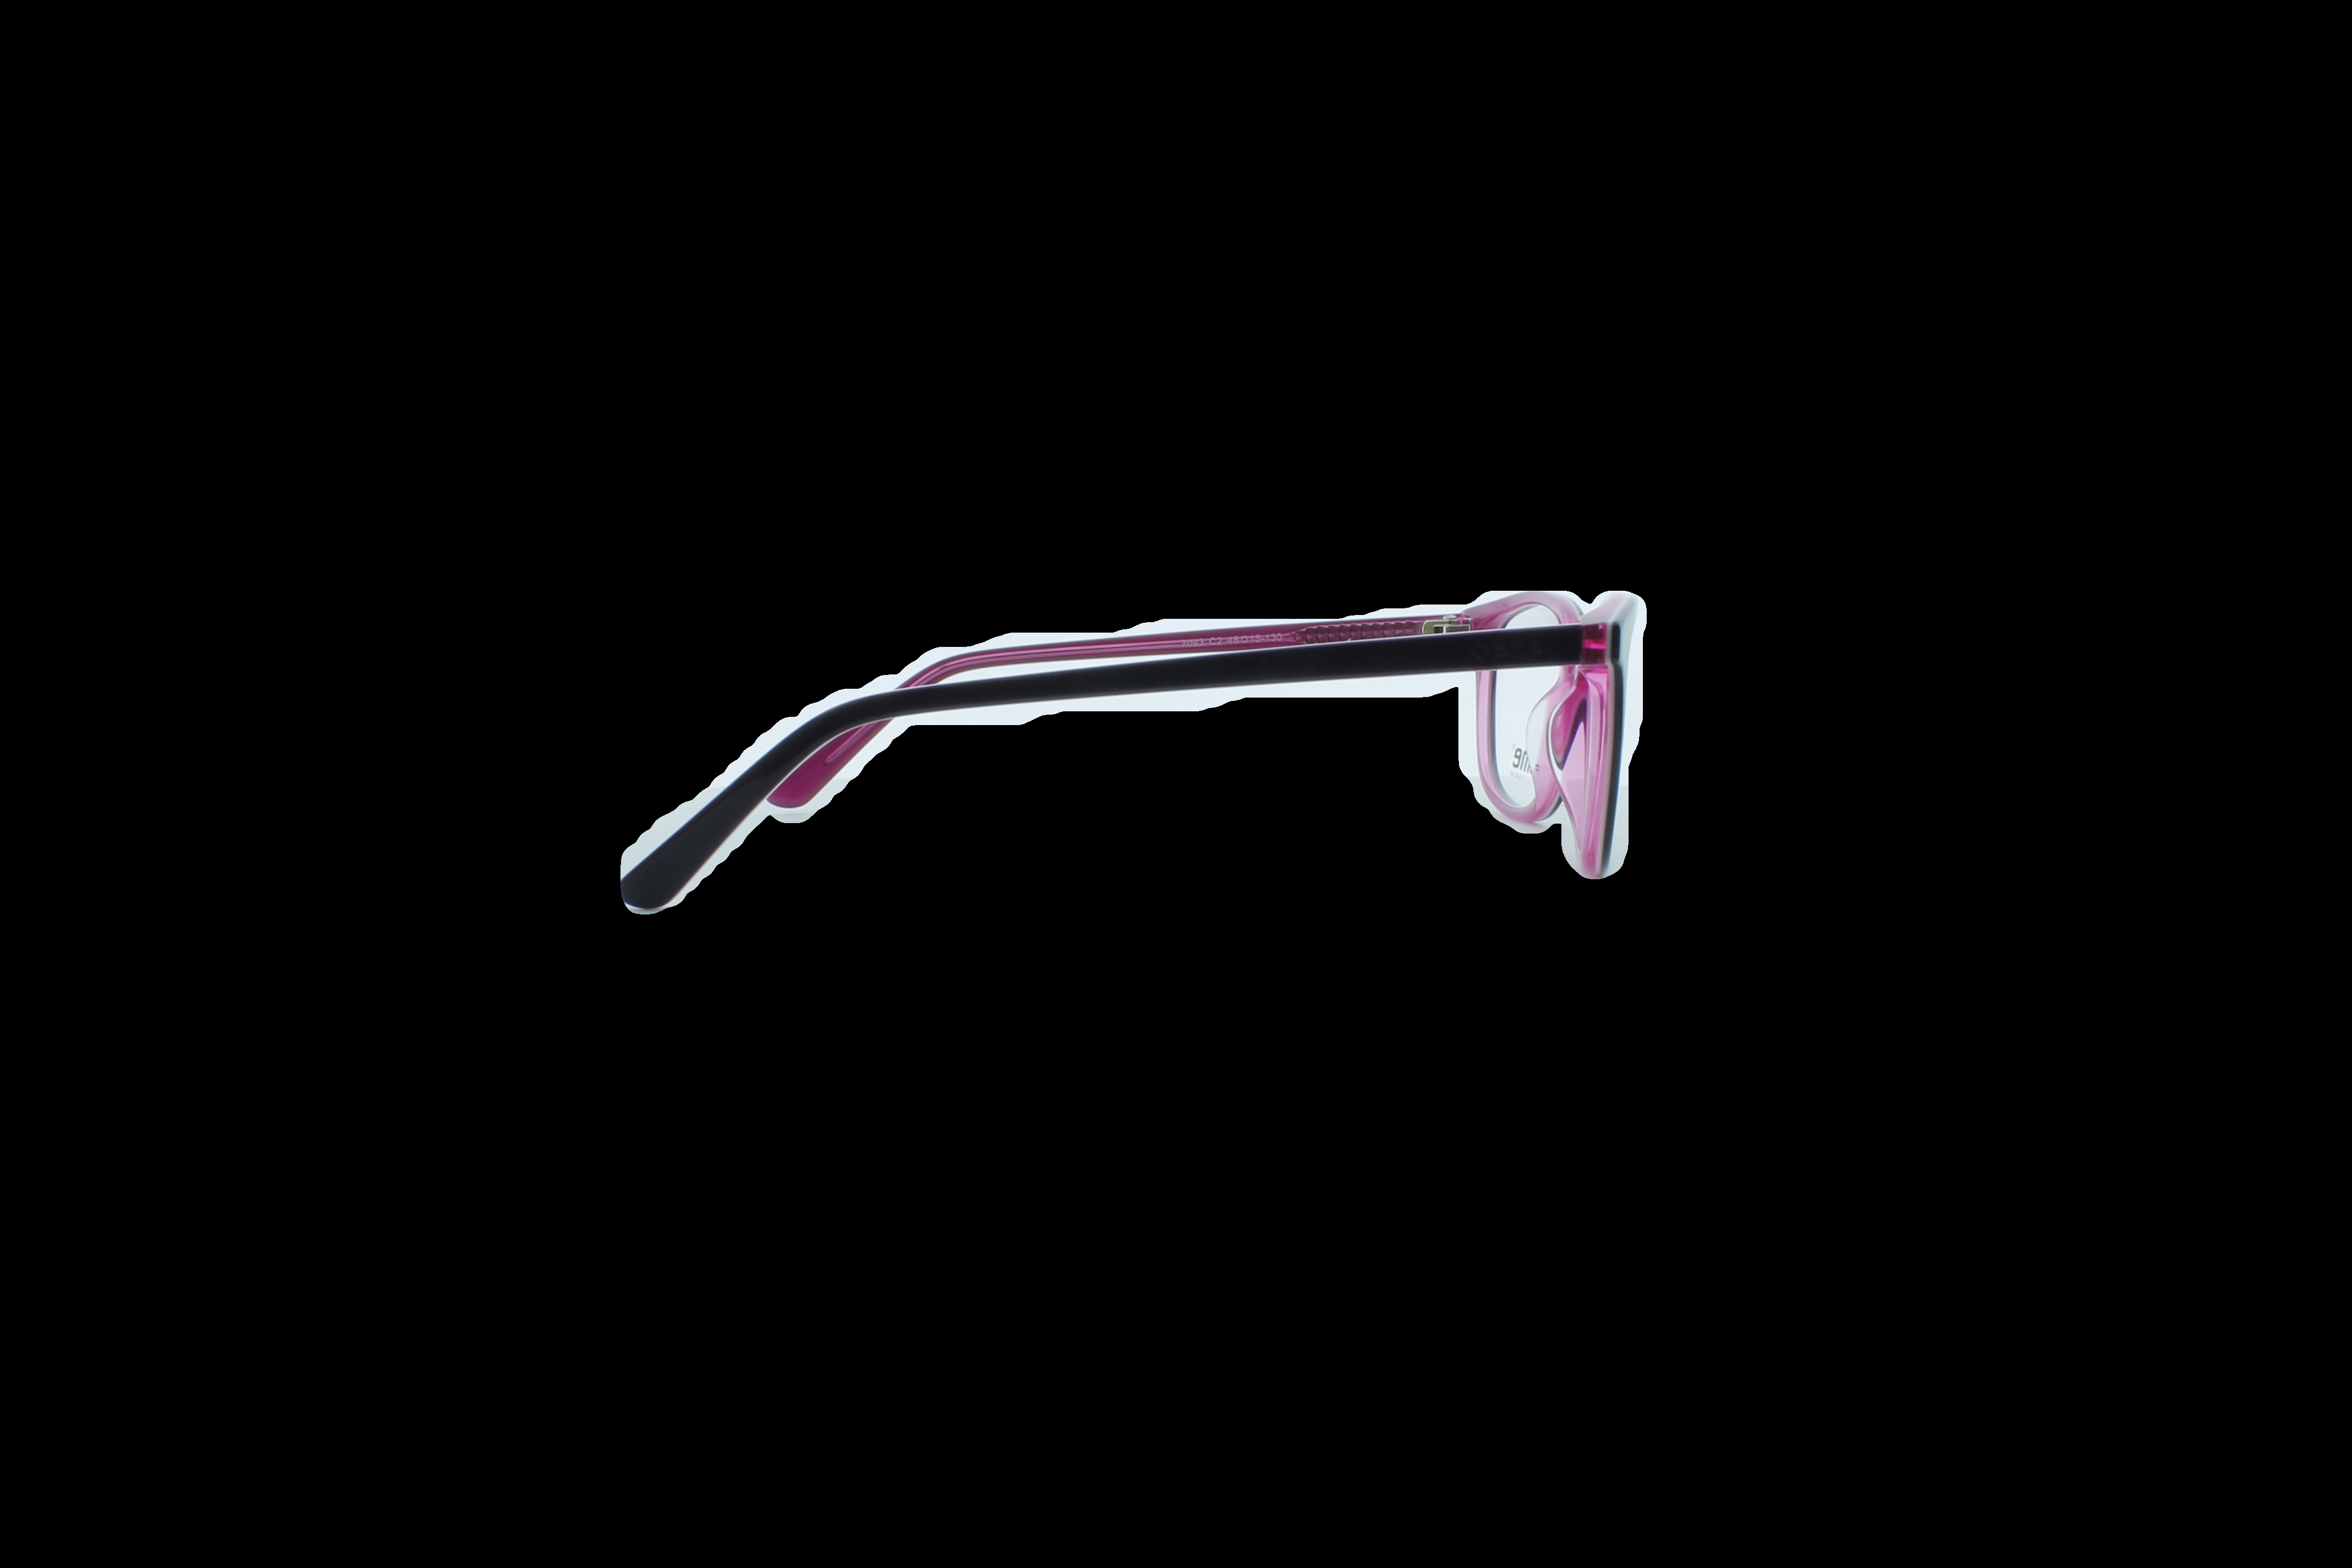

In [73]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Load the image
img = cv2.imread(image_path)

# Load segmentation mask
mask_img = cv2.imread(output_path, cv2.IMREAD_GRAYSCALE)
mask_img = cv2.resize(mask_img, (img.shape[1], img.shape[0]))

# Apply Gaussian blur to the mask to smooth the edges
smoothed_mask = cv2.GaussianBlur(mask_img, (45, 45), 0)

# Apply smoothed segmentation mask to original image
segmented_img = cv2.bitwise_and(img, img, mask=smoothed_mask)

# Display the segmented image
cv2_imshow(segmented_img)
